In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn import cross_validation

In [2]:
path='C:/Users/Ankit/Desktop/ML/iris.data'
names=['sepal-length','sepal-width','petal-length','petal-width','class']
dataset=pd.read_csv(path,names=names)

In [3]:
display(dataset.head())

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.insert(0,'Bias',1)

In [5]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [6]:
display(dataset.head())

,Bias,sepal-length,sepal-width,petal-length,petal-width,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,1,4.7,3.2,1.3,0.2,Iris-setosa
3,1,4.6,3.1,1.5,0.2,Iris-setosa
4,1,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X=dataset.iloc[:,0:5]
Y=dataset.iloc[:,5:6]

In [8]:
X_train,X_test,Y_train,Y_test=cross_validation.train_test_split(X,Y,test_size=0.30,random_state=7)

In [9]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)
X_test=np.array(X_test)

In [10]:
def sigmoid(theta,X):
    den=1.0+np.exp(-X.dot(np.transpose(theta)))
    return 1.0/den

In [11]:
def grad_func(theta,X,y):
    term1=sigmoid(theta,X)-y
    term2=np.transpose(term1).dot(X)
    term2=term2/X.shape[0]
    return term2

In [12]:
def cost_func(theta,X,y):
    m=X.shape[0]
    hx=sigmoid(theta,X)
    y=np.transpose(y)
    term1=y.dot(np.log(hx))
    term2=(1-y).dot(np.log(1-hx))
    res=(-1.0/m)*(term1+term2)
    return res;

In [13]:
def gradient_descent(theta,X,y):
    cost_iter=[]
    #theta_iter=[]
    alpha=0.001
    cost=cost_func(theta,X,y)
    gradient=grad_func(theta,X,y)
    cost_iter.append([0,cost])
    #theta_iter.append([0,theta[0][1]])
    for i in range(0,10000):
        theta=theta-(alpha*gradient)
        gradient=grad_func(theta,X,y)
        cost=cost_func(theta,X,y)
        cost_iter.append([i,cost])
        #theta_iter.append([i,theta[0][1]])
    return theta,cost_iter

In [14]:
Y_train_setosa=np.zeros(shape=Y_train.shape)
Y_test_setosa=np.zeros(shape=Y_test.shape)

In [15]:
for i in range(0,Y_train.shape[0]):
    if Y_train[i][0]=='Iris-setosa':
        Y_train_setosa[i][0]=1
    else:
        Y_train_setosa[i][0]=0
###################################
for i in range(0,Y_test.shape[0]):
    if Y_test[i][0]=='Iris-setosa':
        Y_test_setosa[i][0]=1
    else:
        Y_test_setosa[i][0]=0

In [16]:
theta=np.zeros((1,X_train.shape[1]))
theta_final,cost_iter=gradient_descent(theta,X_train,Y_train_setosa)

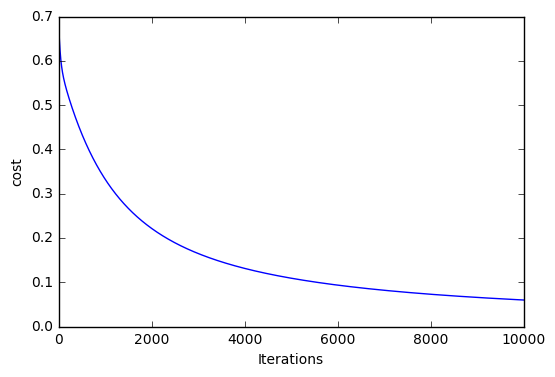

In [17]:
cost_iter=np.array(cost_iter)
plt.plot(cost_iter[:,0],cost_iter[:,1])
plt.xlabel("Iterations")
plt.ylabel("cost")
plt.show()

In [18]:
def accuracy(x,y):
    per=(np.sum(x==y)*100.0)/x.shape[0]
    return per

In [19]:
def predict(theta,X):
    val=sigmoid(theta,X)
    predict=np.where(val>0.5,1,0)
    return predict

In [20]:
Y_predicted=predict(theta_final,X_test)
ans=accuracy(Y_predicted,Y_test_setosa)
ans

100.0

In [21]:
Y_train_ver=np.zeros(shape=Y_train.shape)
Y_test_ver=np.zeros(shape=Y_test.shape)
for i in range(0,Y_train.shape[0]):
    if Y_train[i][0]=='Iris-versicolor':
        Y_train_ver[i][0]=1
    else:
        Y_train_ver[i][0]=0
###################################
for i in range(0,Y_test.shape[0]):
    if Y_test[i][0]=='Iris-versicolor':
        Y_test_ver[i][0]=1
    else:
        Y_test_ver[i][0]=0

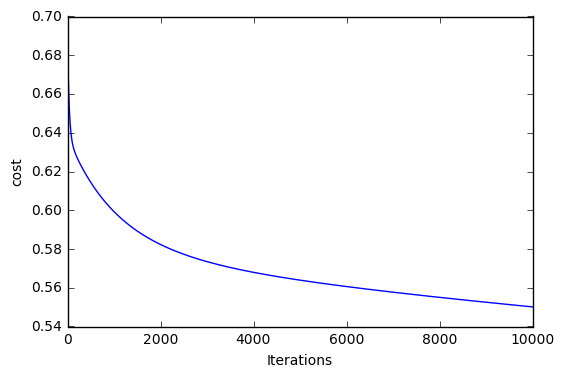

In [22]:
theta_final1,cost_iter1=gradient_descent(theta,X_train,Y_train_ver)
cost_iter1=np.array(cost_iter1)
plt.plot(cost_iter1[:,0],cost_iter1[:,1])
plt.xlabel("Iterations")
plt.ylabel("cost")
plt.show()

In [23]:
predict_ver=predict(theta_final1,X_test)
ans1=accuracy(predict_ver,Y_test_ver)
ans1

60.0

In [24]:
Y_train_virgin=np.zeros(shape=Y_train.shape)
Y_test_virgin=np.zeros(shape=Y_test.shape)
for i in range(0,Y_train.shape[0]):
    if Y_train[i][0]=='Iris-virginica':
        Y_train_virgin[i][0]=1
    else:
        Y_train_virgin[i][0]=0
###################################
for i in range(0,Y_test.shape[0]):
    if Y_test[i][0]=='Iris-virginica':
        Y_test_virgin[i][0]=1
    else:
        Y_test_virgin[i][0]=0

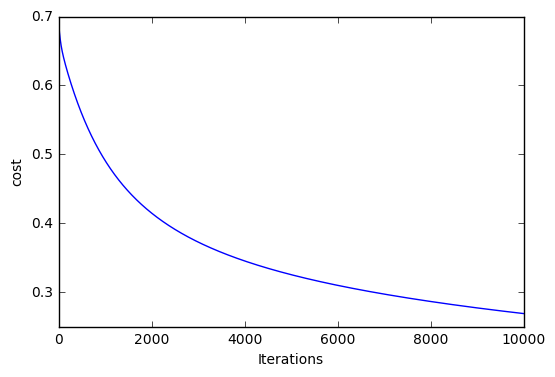

In [25]:
theta_final3,cost_iter3=gradient_descent(theta,X_train,Y_train_virgin)
cost_iter3=np.array(cost_iter3)
plt.plot(cost_iter3[:,0],cost_iter3[:,1])
plt.xlabel("Iterations")
plt.ylabel("cost")
plt.show()

In [26]:
predict_vir=predict(theta_final3,X_test)
ans3=accuracy(predict_vir,Y_test_virgin)
ans3

97.777777777777771